In [ ]:
import os
from particles import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.ndimage as ndimage

from matplotlib import rc

font = {"family": "serif", "weight": "normal", "size": 16}
rc("font", **font)
rc("text", usetex=True)

### Detect discontinuities and unravel periodicity

In [ ]:
def unravel(particles_traj,domain_size) :
    # Detect discontinuities in trajectories and correct them
    traj_px = []
    traj_py = []
    rTrigger = domain_size/2
    for i in range(len(particles_traj)):
        Nx = 0
        Ny = 0
        traj_px.append([particles_traj[i].px[0]])
        traj_py.append([particles_traj[i].py[0]])
        for j in range(1,len(particles_traj[i].px)):
            if particles_traj[i].px[j] - particles_traj[i].px[j-1] > rTrigger:
                Nx -= 1
            if particles_traj[i].px[j] - particles_traj[i].px[j-1] < -rTrigger:
                Nx += 1
            if particles_traj[i].py[j] - particles_traj[i].py[j-1] < -rTrigger:
                Ny += 1
            if particles_traj[i].py[j] - particles_traj[i].py[j-1] > rTrigger:
                Ny -= 1
            traj_px[-1].append(particles_traj[i].px[j]+Nx*2*rTrigger)
            traj_py[-1].append(particles_traj[i].py[j]+Ny*2*rTrigger)
    return traj_px, traj_py
    


### Plot the distribution of the average speed of the particles

In [ ]:
def plot_mean_speeds(circulation,radius,lmbda,ax,number_ax) :
    # Plot the mean speed distribution for different Stokes numbers for given circulation, radius and wavelength
    Tc = 4*1.25643*(pi*radius)**2/((1-exp(-1.25643))*circulation)

    reynolds = circulation*(1-exp(-1.25643))/(2*3.14159*1e-6)

    # Define colors
    colors = [(0,34/255,89/255),(0,51/255,133/255),(5/255,71/255,177/255),(26/255,98/255,214/255),(60/255,135/255,247/255),(100/255,160/255,1)]

    domain_size = radius*40 #meters

    name_files = ["tracer","inertial_t100","inertial_t1000","inertial_t10000","inertial_t100000","inertial_t1000000"]

    paths = []

    for file in name_files:
        paths.append(Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\\Simulation\\Analytical simulation\\"+str(circulation)+"_"+str(radius)+"_"+str(lmbda)+"\\"+str(file)))

    timestep = Tc/300 #seconds

    StokesN = [0,100/Tc,1000/Tc,10000/Tc,100000/Tc,1000000/Tc]

    # Compute the theoretical Stokes drift velocity
    k = 2*pi/lmbda
    om = sqrt(9.81*k)
    usd = om*k*2**2
    
    for path in paths:
        particles_traj = ReadParticles(os.path.basename(os.path.normpath(path)), path)
        traj_px, traj_py = unravel(particles_traj,domain_size)
        mean_speeds = []
        for i in range(len(traj_px)):
            
            mean_speeds.append((traj_py[i][3000]-traj_py[i][0]) / (3001*timestep)) 
        
        hist = ndimage.histogram(mean_speeds, min=np.min(mean_speeds), max = np.max(mean_speeds), bins=50)
        index = name_files.index(os.path.basename(os.path.normpath(path)))
        ax[number_ax].plot(np.linspace(np.min(mean_speeds), np.max(mean_speeds), 50),hist/np.sum(hist),
                label="St = "+str(round(StokesN[index],5-index)),c = colors[index])
        ax[number_ax].set_ylim(0,0.2)

        ax[number_ax].axvline(usd, color = 'red')
    ax[number_ax].legend(loc="upper left")
    ax[number_ax].set_ylabel("PDF")
    if number_ax == 2 :
        ax[number_ax].set_title("Re = "+str("{:.1e}".format(round(reynolds))))
    else :
        ax[number_ax].set_title("Re = "+str("{:.1e}".format(round(reynolds))))

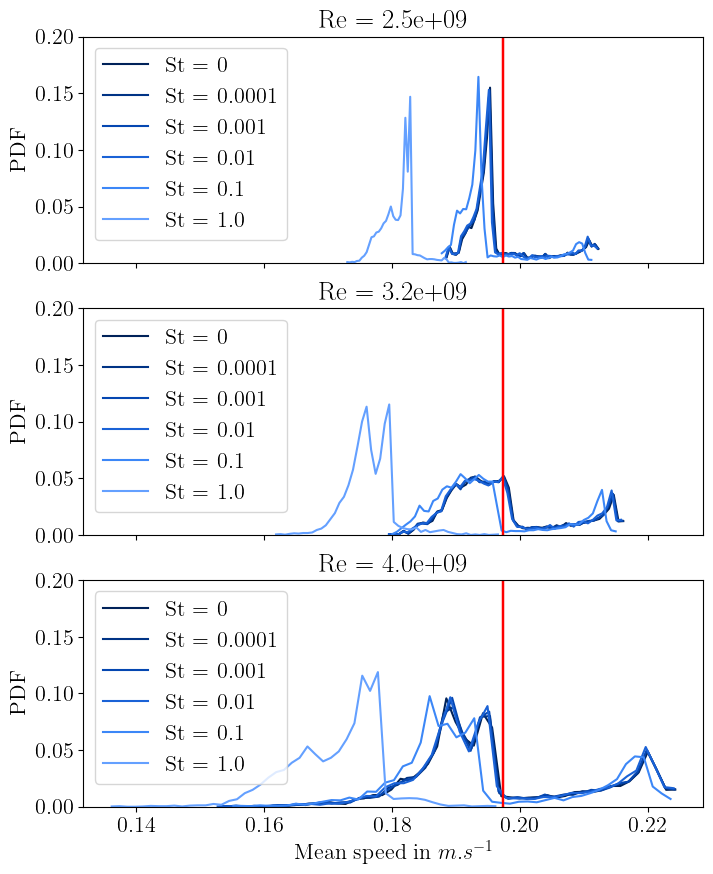

In [5]:
couple_param = [(22000,20000),(28000,20000),(35000,20000)]
lmbda = 100

fig, axs =plt.subplots(3,sharex=True,figsize=(8,10))

plt.subplots_adjust(hspace = 0.2)

for i in range(3):
    plot_mean_speeds(couple_param[i][0],couple_param[i][1],lmbda,axs,i)

axs[-1].set_xlabel("Mean speed in $m.s^{-1}$")


plt.savefig("meanspeed_compare_r20000.pdf")